In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
#test
#************************************************************************
# os.chdir('D:/Sylvain/github/Projet-Cinema')
df=pd.read_csv('allocine_V1.csv', sep=",", index_col='ID')
print('Shape_Etape#2 ' ,df.shape)
# on remplace les virgules par des points pour les notes
df['note_presse']=df['note_presse'].replace(',', '.', regex=True)
df['note_spectateurs']=df['note_spectateurs'].replace(',', '.', regex=True)
df=df.astype({"note_spectateurs":"float","note_presse":"float"})
#on sépare les genres en plusieurs colonnes (1 genre par colonne)
df[['genre_1','genre_2','genre_3','genre_4','genre_5','genre_6','genre_7']]=df['genre'].str.split(',', expand=True)
df=df.rename({"genre":"genres"},axis=1)
df[['acteur_1','acteur_2','acteur_3','acteur_4']]=df['acteurs'].str.split(',', expand=True) # idem pour acteurs
print('Shape_Etape#2 ' ,df.shape)
# idem pour realisateurs mais on ne prend que les 3 premiers
a=[]
b=[]
c=[]
df['realisateur'].fillna('XXXX', inplace=True) # ca sert à éviter de faire planter le split si valeur Nan
for i in range(len(df)):
    if df['realisateur'].iloc[i].count(',')==0:
        a.append(df['realisateur'].iloc[i].split(',')[0])
        b.append(np.NaN)
        c.append(np.NaN)
    elif df['realisateur'].iloc[i].count(',')==1:
        a.append(df['realisateur'].iloc[i].split(',')[0])
        b.append(df['realisateur'].iloc[i].split(',')[1])
        c.append(np.NaN)
    elif df['realisateur'].iloc[i].count(',')>=2:
        a.append(df['realisateur'].iloc[i].split(',')[0])
        b.append(df['realisateur'].iloc[i].split(',')[1])
        c.append(df['realisateur'].iloc[i].split(',')[2])
df.insert(3,'real_1',a)
df.insert(4,'real_2',b)
df.insert(5,'real_3',c)
df['realisateur']=df['realisateur'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
df['real_1']=df['real_1'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
#********************** pour les scenaristes et on prend les 3 premiers
a=[]
b=[]
c=[]
df['scenariste'].fillna('XXXX', inplace=True) # ca sert à éviter de faire planter le split si valeur Nan
for i in range(len(df)):
    if df['scenariste'].iloc[i].count(',')==0:
        a.append(df['scenariste'].iloc[i].split(',')[0])
        b.append(np.NaN)
        c.append(np.NaN)
    elif df['scenariste'].iloc[i].count(',')==1:
        a.append(df['scenariste'].iloc[i].split(',')[0])
        b.append(df['scenariste'].iloc[i].split(',')[1])
        c.append(np.NaN)
    elif df['scenariste'].iloc[i].count(',')>=2:
        a.append(df['scenariste'].iloc[i].split(',')[0])
        b.append(df['scenariste'].iloc[i].split(',')[1])
        c.append(df['scenariste'].iloc[i].split(',')[2])
df.insert(7,'scen_1',a)
df.insert(8,'scen_2',b)
df.insert(9,'scen_3',c)
df['scenariste']=df['scenariste'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
df['scen_1']=df['scen_1'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
#********************** pour les distributeurs et on prend les 3 premiers
a=[]
b=[]
c=[]
df['distributeur'].fillna('XXXX', inplace=True) # ca sert à éviter de faire planter le split si valeur Nan
for i in range(len(df)):
    if df['distributeur'].iloc[i].count('/')==0:
        a.append(df['distributeur'].iloc[i].split('/')[0])
        b.append(np.NaN)
        c.append(np.NaN)
    elif df['distributeur'].iloc[i].count('/')==1:
        a.append(df['distributeur'].iloc[i].split('/')[0])
        b.append(df['distributeur'].iloc[i].split('/')[1])
        c.append(np.NaN)
    elif df['distributeur'].iloc[i].count('/')>=2:
        a.append(df['distributeur'].iloc[i].split('/')[0])
        b.append(df['distributeur'].iloc[i].split('/')[1])
        c.append(df['distributeur'].iloc[i].split('/')[2])
df.insert(7,'distrib_1',a)
df.insert(8,'distrib_2',b)
df.insert(9,'distrib_3',c)
df['distributeur']=df['distributeur'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
df['distrib_1']=df['distrib_1'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
# # ******************************************************************
# #on enleve les films 257571,291995, 36282 et toutes les date commencant par publiée le
df.drop(257571,inplace=True)
df.drop(291995,inplace=True)
df.drop(36282,inplace=True)

df['date']=df['date'].replace('Publiée le ', '', regex=True)
print('Shape_Etape#3 ' ,df.shape)
# #******************************************************************
# #******** extraction des mois (conversion str en num de mois ********
# #*********************************************************************
df['date'].fillna('XX XX XXXX', inplace=True) # ca sert à éviter de faire planter le split si valeur Nan
df[['jour_split','mois_split','annee_split']]=df['date'].str.split(' ', expand=True)
# on remplace les mois en str par leurs numéros
df['mois_split'].replace({'janvier' : '1','février' : '2','mars' : '3','avril' : '4','mai' : '5','juin' : '6',
                               'juillet' : '7','août' : '8','septembre' : '9','octobre' : '10',
                               'novembre' : '11','décembre' : '12', },inplace = True)
df['date']=df['date'].replace('XX XX XXXX',np.NaN,regex=True) # et je retire les XXXX
df['jour_split']=df['jour_split'].replace('XX',np.NaN,regex=True) # et je retire les XXXX
df['mois_split']=df['mois_split'].replace('XX',np.NaN,regex=True) # et je retire les XXXX
df['annee_split']=df['annee_split'].replace('XXXX',np.NaN,regex=True) # et je retire les XXXX
# on cree un colonne date avec les jours,mois, annee
df.insert(30,'date2',pd.to_datetime(dict(year=df.annee_split, month=df.mois_split, day=df.jour_split)))
#on cree une colonne avec les jours semaine
df['day_of_week_split'] = df['date2'].dt.weekday


#************** traitement des budgets & devises ***************************
# on crée une colonne de Nan pour identifier les devises
df.insert(30,'devises',np.NaN)
df['budget'].fillna('XX', inplace=True) # ca sert à éviter de faire planter le split si valeur Nan
#puis on regarde pour chaque cellule du budget si un signe de devise apparait et on indique dans la cellule devise la correspondance
pd.options.mode.chained_assignment = None
for i in range(df.shape[0]):
    if df['budget'].iloc[i].find("$") >=0 :
          df['devises'].iloc[i]='dollars'
    elif df['budget'].iloc[i].lower().find("usd") >=0 :
          df['devises'].iloc[i]='dollars'
    elif df['budget'].iloc[i].lower().find("dolla") >=0 :
          df['devises'].iloc[i]='dollars'
    elif df['budget'].iloc[i].find("€") >=0 :
        df['devises'].iloc[i]='euros'
    elif df['budget'].iloc[i].lower().find("eur") >=0 :
        df['devises'].iloc[i]='euros'
    elif df['budget'].iloc[i].find("F") >=0 :
        df['devises'].iloc[i]='francs'
    elif df['budget'].iloc[i].lower().find("franc") >=0 :
        df['devises'].iloc[i]='francs'
    elif df['budget'].iloc[i].find("£") >=0 :
        df['devises'].iloc[i]='livre'
    elif df['budget'].iloc[i].lower().find("livre") >=0 :
        df['devises'].iloc[i]='livres'
    elif df['budget'].iloc[i].lower().find("pfund") >=0 :
        df['devises'].iloc[i]='livres'
    elif df['budget'].iloc[i].lower().find("yen") >=0 :
        df['devises'].iloc[i]='yens'
    elif df['budget'].iloc[i].lower().lower().find("jpy") >=0 :
        df['devises'].iloc[i]='yens'
    elif df['budget'].iloc[i].find("¥") >=0 :
        df['devises'].iloc[i]='yens'
    elif df['budget'].iloc[i].lower().find("cad") >=0 :
        df['devises'].iloc[i]='dollars canadiens'
    elif df['budget'].iloc[i].lower().find("aud") >=0 :
        df['devises'].iloc[i]='dollars australiens'
    elif df['budget'].iloc[i].lower().find("inr") >=0 :
        df['devises'].iloc[i]='roupie indienne'
    elif df['budget'].iloc[i].lower().find("nok") >=0 :
        df['devises'].iloc[i]='couronne norvegienne'
    else :
         df['devises'].iloc[i]='XX'
# et je retire les XXXX
df['devises']=df['devises'].replace('XX',np.NaN,regex=True) 
# puis on cree une colonne en copiant la serie budget en ne reprenant que les chiffres
import re
df.insert(31,'budgets_montants',df['budget'].apply(lambda x: re.sub(r'[^0-9]', '', x)))
# on change le type de la colonne
df['budgets_montants']=pd.to_numeric(df['budgets_montants'], downcast="float")
#on traite les M€
# il y a 228 films avec un budget <100000 / choix de supprimer cette infos qui correspond à des M€
df=df.loc[(df.budgets_montants.isna())|(df.budgets_montants>100000)]
print('Shape_Etape#4 ' ,df.shape)
# on supprime l'ancienne colonne budget 
df = df.drop('budget', axis=1)
# on enlève les espaces dans les colonnes nb entrées ****************
df.cumul_US = df.cumul_US.str.replace(' ', '')
df.cumul_france = df.cumul_france.str.replace(' ', '')
df.premiere_semaine_france = df.premiere_semaine_france.str.replace(' ', '')
df.premiere_semaine_US = df.premiere_semaine_US.str.replace(' ', '')
#************ reagencement des colonnes ************************************
df = df.reindex(['titre','titre_original','acteurs','acteur_1', 'acteur_2', 'acteur_3', 'acteur_4', 'realisateur', 'real_1', 'real_2', 'real_3',
       'genres', 'genre_1','genre_2', 'genre_3', 'genre_4', 'genre_5','genre_6', 'genre_7',
       'scenariste', 'scen_1', 'scen_2', 'scen_3', 'duree',
        'note_presse', 'note_spectateurs', 'pays',
       'distributeur','distrib_1','distrib_2','distrib_3', 'budget',  'premiere_semaine_france',
       'cumul_france', 'premiere_semaine_US', 'cumul_US',   
        'date2', 'annee','jour_split',
       'mois_split', 'annee_split','day_of_week_split','year'], axis=1)
#reformatage des colonnes
# df.jour_split=pd.to_numeric('jour_split',errors='coerce')
convert_dict = {'jour_split': float,
                'mois_split': float,
                'annee_split': float,
                'cumul_US':float,
                'cumul_france':float,
                'premiere_semaine_france' :float,
                'premiere_semaine_US' :float
                }
 


df=df.astype(convert_dict)

gg=pd.DataFrame(df.dtypes)
display(gg)
df.to_csv('allocineV2-SB.csv')

Shape_Etape#2  (12414, 19)
Shape_Etape#2  (12414, 30)
Shape_Etape#3  (12411, 39)
Shape_Etape#4  (12183, 46)


,0
titre,object
titre_original,object
acteurs,object
acteur_1,object
acteur_2,object
acteur_3,object
acteur_4,object
realisateur,object
real_1,object
real_2,object


In [27]:
df.info

<bound method DataFrame.info of                                                 titre  \
ID                                                      
121                 Les Aventuriers de l'Arche perdue   
1317                                          Vivre !   
2133                                          Top Gun   
2314                                     La Passagère   
3239            The Lodger: A Story of the London Fog   
...                                               ...   
322881  Dhruva Natchathiram Chapter 1: Yuddha Kaandam   
322942                                          Japan   
322948                                Le Balai libéré   
323086                           Paris Lost and Found   
323712                             L'Etrange parcours   

                 titre_original  \
ID                                
121     Raiders of the Lost Ark   
1317                        NaN   
2133                        NaN   
2314                  Pasazerka   
3239            

**Répartition des types de variables du DF**                   

object            28
float64           13
datetime64[ns]     1
int64              1
dtype: int64

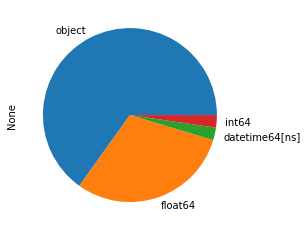

In [28]:
df.dtypes.value_counts().plot.pie()
df.dtypes.value_counts()    

**Valeurs manquantes du DF**

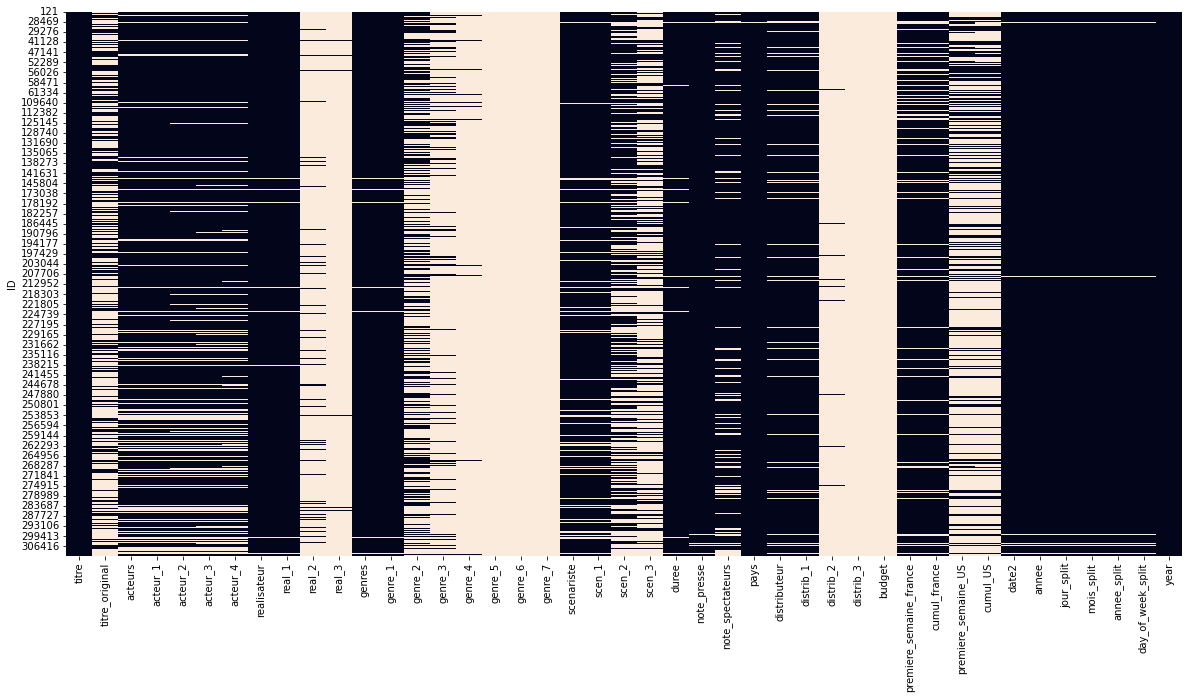

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False); 

**repartition par nationalité**

In [30]:
import plotly.express as px


gg=df.pays.value_counts()
gg=gg.reset_index()
gg=gg.rename({"index":"pays","pays":"nb"},axis=1)
gg.loc[gg['nb'] <100, "pays"] = "Other"
hh=gg.groupby(['pays']).sum()
hh=hh.reset_index()


fig = px.pie(df, values=hh.nb, names=hh.pays,title='Réparatition du nombre de films par nationalité')
fig.show()


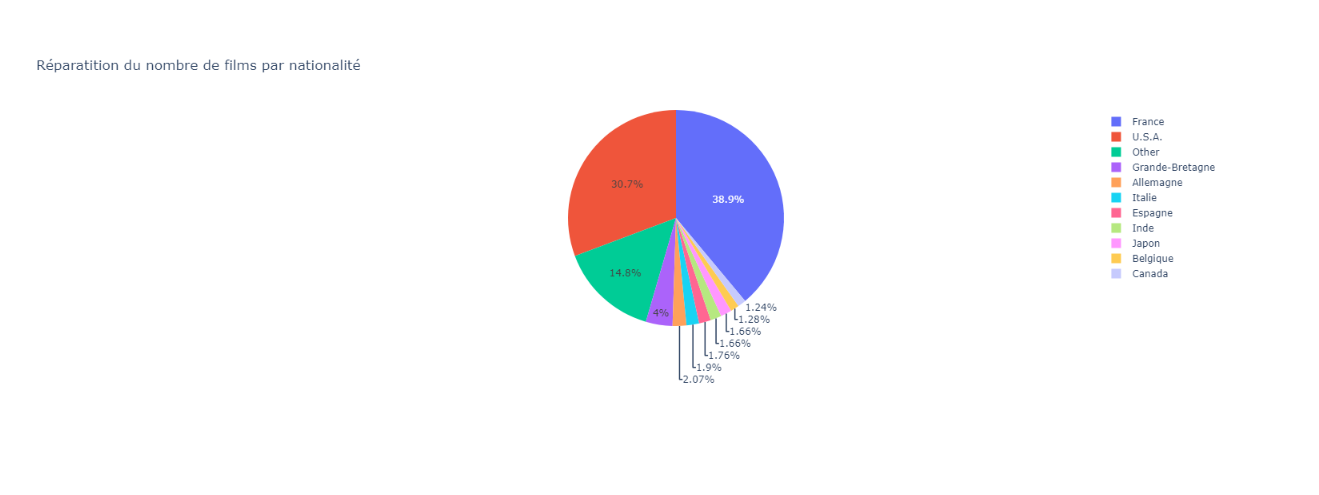

**relation note presse et note spectateurs**

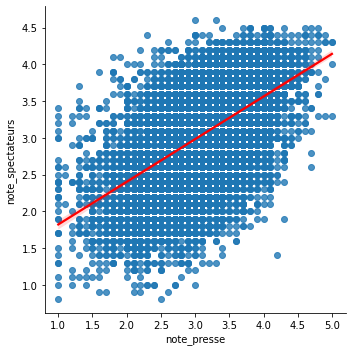

In [31]:
sns.lmplot(x='note_presse',y='note_spectateurs',data=df,ci=100,line_kws={'color': 'red'},);